

#Giorgio Mendoza
#RBE595-S24-S04
#Dr. Dadkhah Terani
#Reinforcement Learning

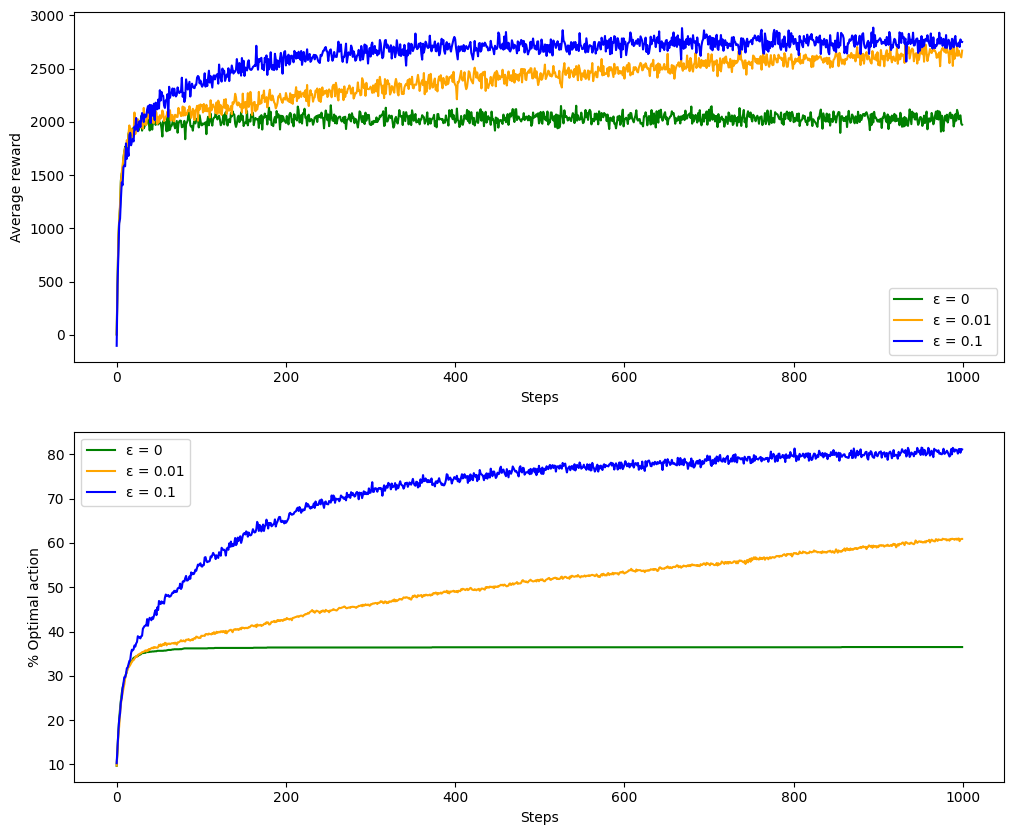

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#number of arms given
k = 10
#number of steps in each bandit problem
steps = 1000
#number of bandit problems (runs)
runs = 2000
#epsilon values for epsilon-greedy methods
epsilons = [0, 0.01, 0.1]

#initialize arrays to store rewards and optimal action counts
average_rewards = np.zeros((len(epsilons), steps))
optimal_action_counts = np.zeros((len(epsilons), steps))

#simulating runs
for run in range(runs):
    #true action values for each arm, normally distributed
    true_action_values = np.random.normal(0, 1, k)
    #best action (arm) to pull
    optimal_action = np.argmax(true_action_values)

    #estimated action values, initialized to 0
    estimated_action_values = np.zeros((len(epsilons), k))
    #number of times each action has been taken
    action_counts = np.zeros((len(epsilons), k))

    for step in range(steps):
        for i, epsilon in enumerate(epsilons):
            #selecting action according to epsilon-greedy strategy
            if np.random.rand() < epsilon:
                action = np.random.choice(k)  # explore
            else:
                action = np.argmax(estimated_action_values[i])  # Exploit

            #get reward from a normal distribution with mean=q*(a) and variance=1
            reward = np.random.normal(true_action_values[action], 1)

            #update action counts
            action_counts[i][action] += 1
            #update estimated action value with incremental formula
            estimated_action_values[i][action] += (reward - estimated_action_values[i][action]) / action_counts[i][action]

            #update average rewards & optimal action counts
            average_rewards[i][step] += reward
            if action == optimal_action:
                optimal_action_counts[i][step] += 1

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
for i, epsilon in enumerate(epsilons):
    if epsilon == 0:
        color = 'green'  #greedy method in green
    elif epsilon == 0.1:
        color = 'blue'   #ε=0.1 method in blue
    else:
        color = 'orange' #ε=0.01 method in orange (default)
    plt.plot(average_rewards[i], label=f'ε = {epsilon}', color=color)
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

plt.subplot(2, 1, 2)
for i, epsilon in enumerate(epsilons):
    if epsilon == 0:
        color = 'green'  #greedy method in green
    elif epsilon == 0.1:
        color = 'blue'   #ε=0.1 method in blue
    else:
        color = 'orange' #ε=0.01 method in orange (default)
    plt.plot(optimal_action_percentages[i], label=f'ε = {epsilon}', color=color)
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.show()


#Explanation:
The plots illustrate the performance of different ε-greedy strategies in a 10-armed bandit problem over 1000 steps as in the book example. The top plot shows the average reward, where the ε = 0.1 strategy rapidly increases and maintains the highest average reward, indicating effective exploration and exploitation. The ε = 0.01 strategy shows steady improvement, suggesting a more conservative approach. The ε = 0 strategy (greedy) starts strong but plateaus, reflecting limited exploration.

The bottom plot represents the percentage of optimal action selections. The ε = 0.1 strategy quickly increases to the highest percentage of optimal actions, showcasing its aggressive exploration. On the other hand, the ε = 0 strategy flatlines, demonstrating its exploitation focus and potential for getting stuck on suboptimal choices. The ε = 0.01 strategy balances between these extremes, gradually increasing the percentage of optimal actions chosen, highlighting its potential for long-term performance improvement.